There is a directed graph of n nodes with each node labeled from 0 to n - 1. The graph is represented by a 0-indexed 2D integer array graph where graph[i] is an integer array of nodes adjacent to node i, meaning there is an edge from node i to each node in graph[i].

A node is a terminal node if there are no outgoing edges. A node is a safe node if every possible path starting from that node leads to a terminal node (or another safe node).

Return an array containing all the safe nodes of the graph. The answer should be sorted in ascending order.

 

Example 1:
Illustration of graph

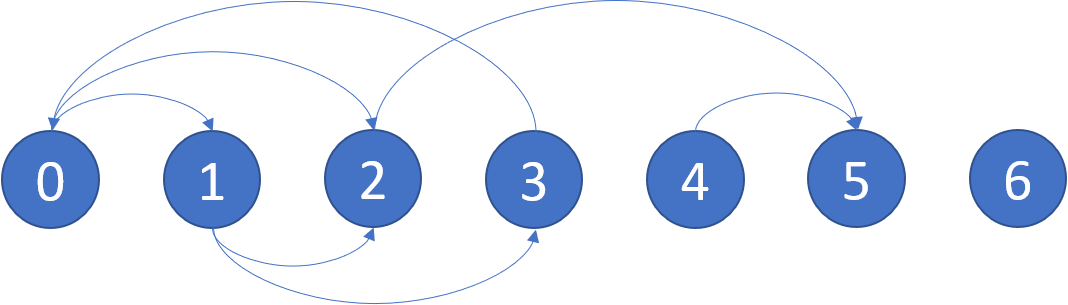

Input: graph = [[1,2],[2,3],[5],[0],[5],[],[]]
Output: [2,4,5,6]
Explanation: The given graph is shown above.
Nodes 5 and 6 are terminal nodes as there are no outgoing edges from either of them.
Every path starting at nodes 2, 4, 5, and 6 all lead to either node 5 or 6.

Example 2:

Input: graph = [[1,2,3,4],[1,2],[3,4],[0,4],[]]
Output: [4]
Explanation:
Only node 4 is a terminal node, and every path starting at node 4 leads to node 4.

 

Constraints:

    n == graph.length
    1 <= n <= 104
    0 <= graph[i].length <= n
    0 <= graph[i][j] <= n - 1
    graph[i] is sorted in a strictly increasing order.
    The graph may contain self-loops.
    The number of edges in the graph will be in the range [1, 4 * 104].



In [ ]:
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        safe_nodes = set()
        unsafe_nodes = set()

        for i, node in enumerate(graph):
            if node == []:
                safe_nodes.add(i)

        visited = [False for _ in graph]
        
        def dfs(node):
            if node in safe_nodes:
                return True
            if node in unsafe_nodes:
                return False
            if visited[node]:
                unsafe_nodes.add(node)
                return False

            visited[node] = True
            if all([dfs(node) for node in graph[node]]):
                safe_nodes.add(node)
                ans = True
            else:
                unsafe_nodes.add(node)
                ans = False
            visited[node] = False

            return ans
        for i in range(len(graph)):
            if i in safe_nodes or i in unsafe_nodes:
                continue
            dfs(i)
        return sorted(safe_nodes)

In [ ]:
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        fwd = defaultdict(set)
        rev = defaultdict(set)
        ans = set()
        for i, nodes in enumerate(graph):
            for node in nodes:
                fwd[i].add(node)
                rev[node].add(i)
            if len(nodes) == 0:
                ans.add(i)
        
        q = deque(ans)
        while q:
            node = q.popleft()
            if len(fwd[node]) > 0:
                continue
            ans.add(node)
            parents = list(rev[node])
            for parent in parents:
                q.append(parent)
                rev[node].remove(parent)
                fwd[parent].remove(node)
        return sorted(ans)

In [ ]:
class Solution:
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        n = len(graph)
        indegree = [0] * n
        adj = [[] for _ in range(n)]

        for i in range(n):
            for node in graph[i]:
                adj[node].append(i)
                indegree[i] += 1

        q = deque()
        # Push all the nodes with indegree zero in the queue.
        for i in range(n):
            if indegree[i] == 0:
                q.append(i)

        safe = [False] * n
        while q:
            node = q.popleft()
            safe[node] = True

            for neighbor in adj[node]:
                # Delete the edge "node -> neighbor".
                indegree[neighbor] -= 1
                if indegree[neighbor] == 0:
                    q.append(neighbor)

        safeNodes = []
        for i in range(n):
            if safe[i]:
                safeNodes.append(i)

        return safeNodes